Recently, I was reading through [A/B Testing with Machine Learning - A Step-by-Step Tutorial](https://www.business-science.io/business/2019/03/11/ab-testing-machine-learning.html) written by [Matt Dancho](https://www.linkedin.com/in/mattdancho/) of [Business Science](https://www.business-science.io). I have been always fascinated by the idea of **A/B Testing** and the amount of impact it can bring in businesses. The tutorial is very definitive and Matt has explained each and every step in the tutorial. He has detailed about each and every decision taken while developing the solution. 

Even though the tutorial is written in `R`, I was able to scram through his code and my knowledge of Data Science helped me to understand the concepts very quickly. I will have to thank Matt for putting together all the key ingredients of the Data Science world and or using them to solve a real problem.  

I decided to replicate the solution in `Python` and I was able to do it. However, there are some minor differences in my implementation but those can be ignored, I think. Apart from cell annotations, I have not detailed any of the steps because, for that, you really should follow the article I mentioned. 

## Data loading

In [1]:
import pandas as pd

control_data = pd.read_csv('control_data.csv')
experiment_data = pd.read_csv('experiment_data.csv')

In [3]:
control_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [5]:
experiment_data.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


## Number summaries and basic investigations

In [8]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [10]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [12]:
control_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [14]:
experiment_data.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64

In [16]:
control_data[control_data['Enrollments'].isna()]

,Date,Pageviews,Clicks,Enrollments,Payments
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN
32,"Wed, Nov 12",10134,801,NaN,NaN


## Data wrangling

In [19]:
# Combine with Experiment data
data_total = pd.concat([control_data, experiment_data])
data_total.sample(10)

,Date,Pageviews,Clicks,Enrollments,Payments
31,"Tue, Nov 11",9931,831,NaN,NaN
7,"Sat, Oct 18",7434,632,110.0,70.0
13,"Fri, Oct 24",9402,697,194.0,94.0
24,"Tue, Nov 4",9427,743,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
15,"Sun, Oct 26",8881,693,153.0,101.0
14,"Sat, Oct 25",8687,691,176.0,128.0
8,"Sun, Oct 19",8434,697,120.0,77.0
32,"Wed, Nov 12",10042,802,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN


In [21]:
import numpy as np
np.random.seed(7)
import sklearn.utils

# Add row id
data_total['row_id'] = data_total.index

# Create a Day of Week feature
data_total['DOW'] = data_total['Date'].str.slice(start=0, stop=3)

# Remove missing data
data_total.dropna(inplace=True)

# Add a binary column Experiment to denote
# if the data was part of the experiment or not (Random)
data_total['Experiment'] = np.random.randint(2, size=len(data_total))

# Remove missing data
data_total.dropna(inplace=True)

# Remove Date and Payments columns
del data_total['Date'], data_total['Payments']

# Shuffle the data
data_total = sklearn.utils.shuffle(data_total)

In [22]:
# Check the new data
data_total.head()

,Pageviews,Clicks,Enrollments,row_id,DOW,Experiment
21,8460,681,156.0,21,Sat,0
3,9867,827,138.0,3,Tue,1
21,8448,695,142.0,21,Sat,0
13,9434,673,220.0,13,Fri,1
6,9008,748,146.0,6,Fri,1


In [23]:
# Reorder the columns 
data_total = data_total[['row_id', 'Experiment', 'Pageviews', 'Clicks', 'DOW', 'Enrollments']]

In [27]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total.loc[:, data_total.columns != 'Enrollments'],\
                                                    data_total['Enrollments'], test_size=0.2)

In [29]:
# Converting strings to numbers
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_train['DOW'] = lb.fit_transform(X_train['DOW'])
X_test['DOW'] = lb.transform(X_test['DOW'])

In [31]:
X_train.head()

,row_id,Experiment,Pageviews,Clicks,DOW
16,16,0,9535,759,1
10,10,1,10551,864,5
2,2,0,10480,884,1
3,3,1,9867,827,5
16,16,0,9655,771,1


In [33]:
X_test.head()

,row_id,Experiment,Pageviews,Clicks,DOW
12,12,0,8324,665,4
18,18,1,9262,727,6
1,1,0,9288,785,3
1,1,0,9102,779,3
19,19,0,9345,734,4


## Helper functions
- Function for printing the evaluation scores related to a _regression_ problem
- Function for plotting the original values and values predicted by the model

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

## Linear regression: A baseline

In [41]:
import statsmodels.api as sm

X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [42]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [43]:
calculate_metrics(y_test, y_preds)

RMSE Score: 23.988871314039827
R2_Squared: 0.05095001827039547
MAE Score: 19.586061838775073


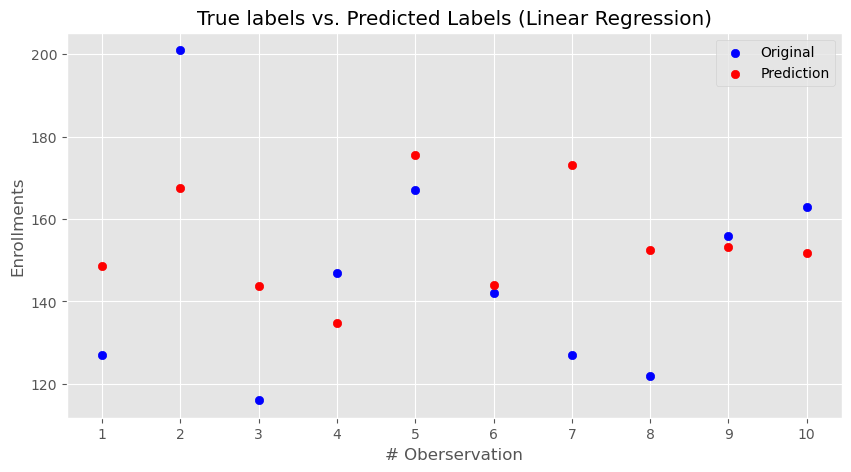

In [47]:
plot_preds(y_test, y_preds, 'Linear Regression')

In [49]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:            Enrollments   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              400.1
Date:                Thu, 12 Dec 2024   Prob (F-statistic):                    7.92e-27
Time:                        23:19:03   Log-Likelihood:                         -163.65
No. Observations:                  36   AIC:                                      335.3
Df Residuals:                      32   BIC:                                      341.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
1,Pageviews,1.974764e-07
2,Clicks,3.804647e-05
3,DOW,2.299762e-01
0,Experiment,8.634578e-01


## Model 02: Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

calculate_metrics(y_test, y_preds)

RMSE Score: 26.8540034259326
R2_Squared: -0.1892893660531696
MAE Score: 21.78333333333333


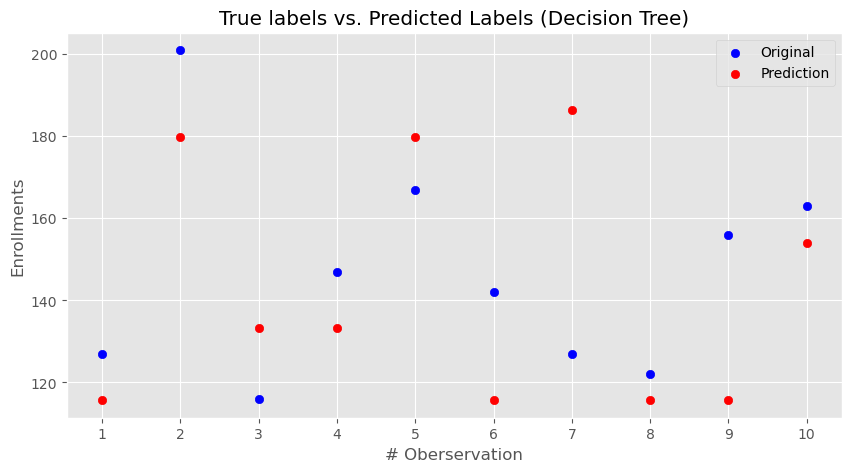

In [56]:
plot_preds(y_test, y_preds, 'Decision Tree')

## Decision tree visualization

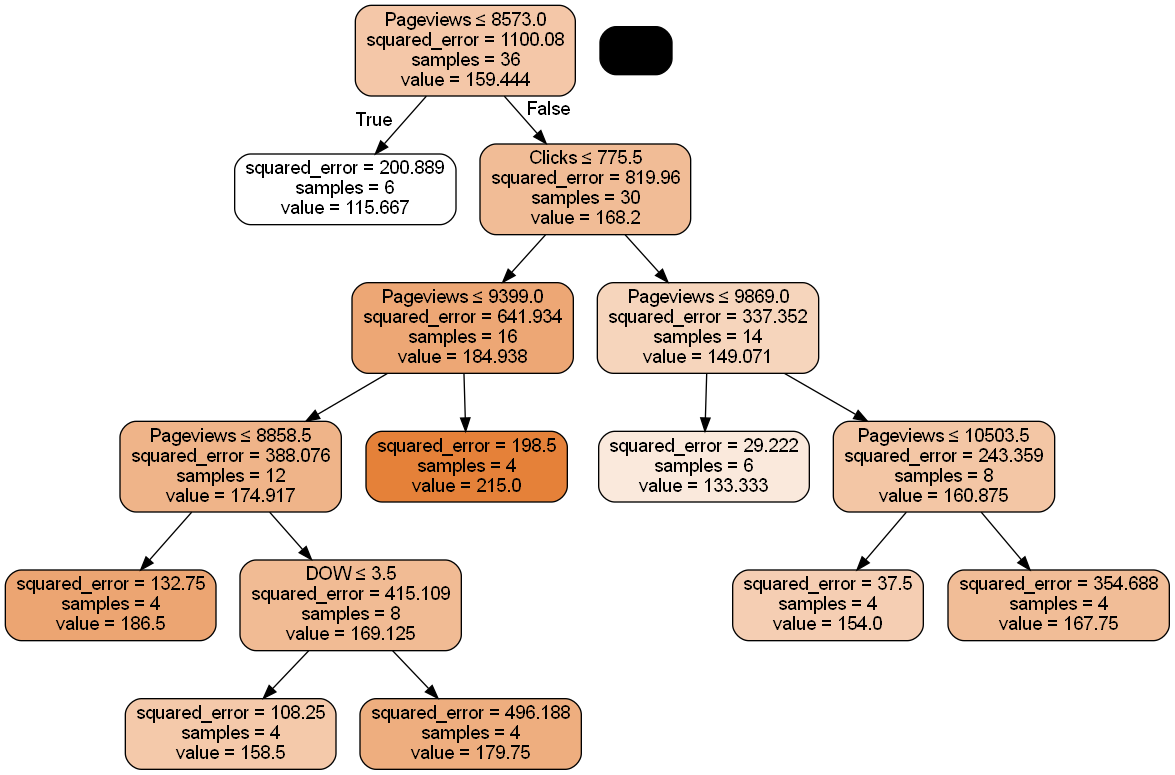

In [61]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, 
                feature_names=X_train_refined.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## Model 03: `XGBoost`

In [64]:
import xgboost as xgb

In [66]:
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

In [68]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [70]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [72]:
xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

C:\Users\ashis\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:21:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\ashis\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:21:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "gamma", "max_depth", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


In [74]:
calculate_metrics(y_test, y_preds)

RMSE Score: 29.97456429419797
R2_Squared: -0.48175094766641613
MAE Score: 25.68724670410156


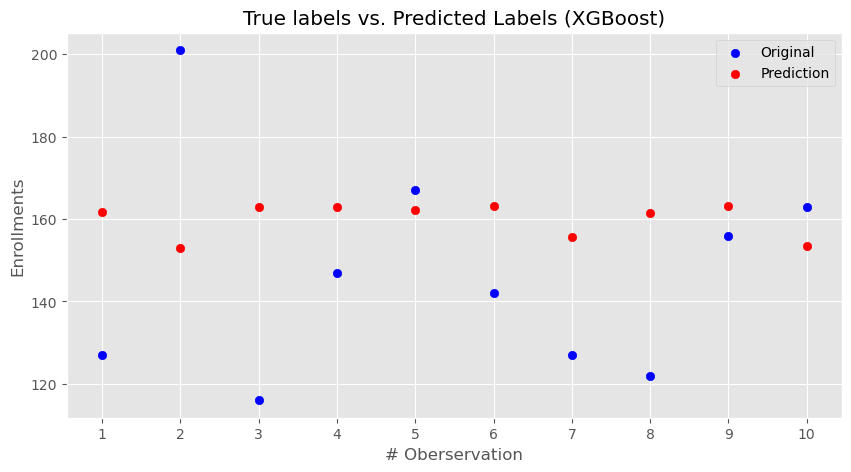

In [76]:
plot_preds(y_test, y_preds, 'XGBoost')

> I used a `gblinear` booster for XGBoost and XGBoost currently does support feature importances linear models.

## Model 04: H2O.ai's AutoML

In [88]:
pip install h2o

     ---------------------------------------- 0.0/265.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/265.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/265.8 MB ? eta -:--:--
     ---------------------------------------- 0.3/265.8 MB ? eta -:--:--
     ---------------------------------------- 0.3/265.8 MB ? eta -:--:--
     ---------------------------------------- 0.3/265.8 MB ? eta -:--:--
     -------------------------------------- 0.5/265.8 MB 493.7 kB/s eta 0:08:58
     -------------------------------------- 0.5/265.8 MB 493.7 kB/s eta 0:08:58
     -------------------------------------- 0.5/265.8 MB 493.7 kB/s eta 0:08:58
     -------------------------------------- 0.8/265.8 MB 430.1 kB/s eta 0:10:17
     -------------------------------------- 0.8/265.8 MB 430.1 kB/s eta 0:10:17
     -------------------------------------- 1.0/265.8 MB 449.4 kB/s eta 0:09:50
     -------------------------------------- 1.0/265.8 MB 449.4 kB/s eta 0:09:50
  


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
conda install -c conda-forge h2o-py openjdk -y

error: incomplete escape \U at position 28

In [102]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu23.30+13-CA (build 23.0.1+11, mixed mode, sharing)
  Starting server from C:\Users\ashis\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ashis\AppData\Local\Temp\tmpm0v2rzbj
  JVM stdout: C:\Users\ashis\AppData\Local\Temp\tmpm0v2rzbj\h2o_ashis_started_from_python.out
  JVM stderr: C:\Users\ashis\AppData\Local\Temp\tmpm0v2rzbj\h2o_ashis_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_ashis_plz6kq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.894 Gb
H2O_cluster_total_cores:,20
H2O_cluster_allowed_cores:,20
H2O_cluster_status:,"locked, healthy"


> To use h2o.ai's utilities on the dataset, the library requires the data to be in **H2OFrame** format. 

In [105]:
X_train['Enrollments'] = y_train
X_test['Enrollments'] = y_test

In [107]:
X_train_h2o = h2o.H2OFrame(X_train)
X_test_h2o = h2o.H2OFrame(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [109]:
features = X_train.columns.values.tolist()
target = "Enrollments"

In [111]:
# Construct the AutoML pipeline
auto_h2o = H2OAutoML()
# Train 
auto_h2o.train(x=features,
               y=target,
               training_frame=X_train_h2o)

AutoML progress: |
00:13:14.41: AutoML: XGBoost is not available; skipping it.


00:13:14.708: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 36.0.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_1_20241213_01314_model_65


Status of Neuron Layers: predicting Enrollments, regression, gaussian distribution, Quadratic loss, 5,451 weights/biases, 70.1 KB, 360,360 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight           weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  ---------------------  ----------  --------------------  -------------------  -------------------  -----------------------
    1        5        Input             10.0
    2        50       RectifierDropout  30.0       0.0   0.0   0.005184153188485652  0.0039010699838399887  0.0         -0.01530593307648087  0.3239099979400635   0.08944287130854534  0.22281718254089355
    3        50       RectifierDropout  30.0       0.0   0.0   0.010905219708918595  0.009547997266054153   0.0         -0.1038625737237453   0.23536056280136108  0.425702263311959    0.30098581314086914
    4        50       RectifierDropout  30.0       0.0   0.0   0.01647376894149929   0.01210443302989006    0.0         -0.07795209798671277  0.21638166904449463  0.46098365753208176  0.11991885304450989
    5        1        Linear                       0.0   0.0   0.003968799447175115  0.0016836943104863167  0.0         -0.11238445356488228  0.2434665560722351   0.5240926372393003   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 58.59489638995875
RMSE: 7.654730327709706
MAE: 5.122553340910633
RMSLE: 0.060369648415585876
Mean Residual Deviance: 58.59489638995875

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 411.67626212063794
RMSE: 20.28980685271888
MAE: 16.530500351362402
RMSLE: 0.12949509228097517
Mean Residual Deviance: 411.67626212063794

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     16.3936   4.02205    21.3228       15.1595       15.2446       10.9777       19.2632
mean_residual_deviance  402.038   215.499    749.03        347.508       295.106       179.392       439.153
mse                     402.038   215.499    749.03        347.508       295.106       179.392       439.153
r2                      0.559447  0.139871   0.627531      0.543048      0.328183      0.6925        0.605975
residual_deviance       402.038   215.499    749.03        347.508       295.106       179.392       439.153
rmse                    19.5077   5.18275    27.3684       18.6416       17.1787       13.3937       20.956
rmsle                   0.125     0.0332947  0.160532      0.150124      0.096861      0.0840437     0.133439

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-12-13 01:08:11  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2024-12-13 01:08:11  9 min 35.993 sec  90000 obs/sec     10        1             360        26.1892          685.876              21.7208         0.376522
    2024-12-13 01:08:13  9 min 37.228 sec  290847 obs/sec    10010     1001          360360     7.6

In [113]:
# Overview of how the models performed
auto_h2o.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_3_AutoML_1_20241213_01314_model_65,20.2898,411.676,16.5305,0.129495,411.676
DeepLearning_grid_2_AutoML_1_20241213_01314_model_54,20.3179,412.816,17.107,0.127202,412.816
DeepLearning_grid_1_AutoML_1_20241213_01314_model_197,20.5639,422.873,17.7676,0.128536,422.873
DeepLearning_grid_3_AutoML_1_20241213_01314_model_35,20.7664,431.245,16.3718,0.128259,431.245
StackedEnsemble_BestOfFamily_6_AutoML_1_20241213_01314,20.774,431.56,17.2512,0.133523,431.56
DeepLearning_grid_1_AutoML_1_20241213_01314_model_1000,21.0073,441.307,16.9879,0.130059,441.307
DeepLearning_grid_1_AutoML_1_20241213_01314_model_332,21.0294,442.234,17.9385,0.128107,442.234
DeepLearning_grid_1_AutoML_1_20241213_01314_model_686,21.0475,442.996,16.9581,0.138805,442.996
StackedEnsemble_AllModels_4_AutoML_1_20241213_01314,21.0609,443.561,16.8795,0.128447,443.561
DeepLearning_grid_1_AutoML_1_20241213_01314_model_163,21.0719,444.024,17.3472,0.131581,444.024


In [115]:
# Extract the best model from the leaderboard
auto_h2o = auto_h2o.leader

In [117]:
X_test_temp = X_test.copy()
del X_test_temp['Enrollments']

In [119]:
# Employing the model to make inference
X_test_h2o_copy = h2o.H2OFrame(X_test_temp)
y_preds = auto_h2o.predict(X_test_h2o_copy)

# Convert the predictions to a native list
y_preds = h2o.as_list(y_preds["predict"])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


C:\Users\ashis\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [121]:
calculate_metrics(y_test, y_preds)

RMSE Score: 23.8103080103663
R2_Squared: 0.06502611064629316
MAE Score: 21.364821951896225


> **XGBoost Still Wins!**